In [432]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer

In [433]:
# data = pd.read_csv(r"glass.csv")
# x = data.iloc[:, 1:10].values
# y = data.iloc[:, 10].values
# data = load_breast_cancer()
# x = data['data']
# y = data['target']
data = pd.read_csv(r"SVNE_Hieu.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [434]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)


In [435]:
x_train.shape

(996, 6)

In [436]:
labels = np.zeros((10, 10))
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

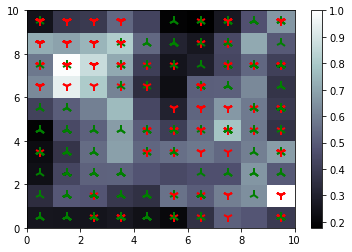

In [437]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', '8', 's', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[w[0], w[1]] -= 1
    elif y_train[i] == 1:
        labels[w[0], w[1]] += 1
show()

In [438]:
labels

array([[  4.,   1.,   1.,   7.,   3.,   2.,  -9., -13., -60., -45.],
       [ 12.,  13.,  45.,  16.,  20.,   3.,  -2., -21., -21., -17.],
       [  8.,  27.,   9.,   4.,   3.,   0.,  -2., -11., -17.,  -8.],
       [ 44.,   5.,   8.,   0.,   2.,   0.,   0.,  -3., -15., -23.],
       [ 12.,   8.,   0.,  -1.,  -1.,   0.,   0.,   0.,   3.,   0.],
       [  1.,  -1.,   0.,   1.,   2.,  -2.,   0.,   0.,   9.,   2.],
       [  1.,   8.,   1.,  -2.,  -4.,  -8., -15.,   1.,  -1.,   1.],
       [ -1.,  -3.,   3.,  -1.,   3.,  -4.,   5.,   3.,   4.,  -1.],
       [  0.,   1.,   3.,   2.,   2.,   1.,   0.,   4.,   0.,   6.],
       [  2.,  -5.,   3., -15.,   0.,  43.,   3.,  83.,   1., -23.]])

In [439]:
mappings = som.win_map(x_train)
som.weights

array([[[0.42933787, 0.3146659 , 0.33310658, 0.5238812 , 0.57216411,
         0.06221809],
        [0.3843504 , 0.4241688 , 0.41271737, 0.43475322, 0.55277542,
         0.08630731],
        [0.34773953, 0.43311914, 0.50469638, 0.38402345, 0.53251558,
         0.07562897],
        [0.32190319, 0.43217798, 0.55992519, 0.37478316, 0.48506255,
         0.14260511],
        [0.31558676, 0.41292369, 0.57318644, 0.38715743, 0.47251684,
         0.16790856],
        [0.32790859, 0.37220686, 0.52208658, 0.45448975, 0.49021915,
         0.1857091 ],
        [0.32814482, 0.35734432, 0.48165837, 0.40199351, 0.47873941,
         0.37661787],
        [0.29281203, 0.25795938, 0.43336888, 0.3647798 , 0.30843898,
         0.65704686],
        [0.23411116, 0.19618547, 0.43793868, 0.20369088, 0.12506063,
         0.8110381 ],
        [0.27387656, 0.17967154, 0.37903171, 0.33607872, 0.15788321,
         0.7817728 ]],

       [[0.39129886, 0.3739035 , 0.35825342, 0.48813905, 0.58340095,
         0.00997374

In [440]:
# parameter for LVQ
R = 50 # R is the # of initial prototype for each class
n_classes = 2
epsilon = 0.9
epsilon_dec_factor = 0.001

In [441]:
# class of prototype vectors
class prototype(object):
    def __init__(self, class_id, p_vector, epsilon):
        self.class_id = class_id
        self.p_vector = p_vector
        self.epsilon = epsilon
    def update(self, u_vector, increment = True):
        if increment:
            # Move the prototype closer to input vector
            self.p_vector = self.p_vector + self.epsilon * (u_vector - self.p_vector)
        else:
            # Move the prototype away from input vector
            self.p_vector = self.p_vector - self.epsilon * (u_vector - self.p_vector)

In [442]:
# function to find the closest prototype vector for a given vector
def find_closest(in_vector, proto_vectors):
    position = None
    closest = None
    closest_distance = 99999
#     for p_v in proto_vectors:
#         distance = np.linalg.norm(in_vector - p_v.p_vector)
#         if distance < closest_distance:
#             closest_distance = distance
#             closest = p_v
    for i in range(len(proto_vectors)):
        distance = np.linalg.norm(in_vector - proto_vectors[i].p_vector)
        if distance < closest_distance:
            closest_distance = distance
            closest = proto_vectors[i]
            position = i
    return [position, closest]

In [443]:
# function to find the second closest prototype vector for a given vector
def find_runnerup(in_vector, proto_vectors):
    runnerup = None
    closest_p_vector = find_closest(in_vector, proto_vectors)
    closest_distance = 99999
    for p_v in proto_vectors:
        distance = np.linalg.norm(in_vector - p_v.p_vector)
        if (distance < closest_distance) and (p_v != closest_p_vector):
            closest_distance = distance
            runnerup = p_v
    return runnerup

In [444]:
def find_class_id(test_vector, p_vectors):
    return find_closest(test_vector, p_vectors)[1].class_id

In [445]:
from random import randint
p_vectors = []
for i in range(10):
    for j in range(10):
        if(labels[i][j] == 0):
            p = prototype(randint(0,1), som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(labels[i][j] > 0):
            p = prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(labels[i][j] < 0):
            p = prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

1 	 [0.42933787 0.3146659  0.33310658 0.5238812  0.57216411 0.06221809]
1 	 [0.3843504  0.4241688  0.41271737 0.43475322 0.55277542 0.08630731]
1 	 [0.34773953 0.43311914 0.50469638 0.38402345 0.53251558 0.07562897]
1 	 [0.32190319 0.43217798 0.55992519 0.37478316 0.48506255 0.14260511]
1 	 [0.31558676 0.41292369 0.57318644 0.38715743 0.47251684 0.16790856]
1 	 [0.32790859 0.37220686 0.52208658 0.45448975 0.49021915 0.1857091 ]
0 	 [0.32814482 0.35734432 0.48165837 0.40199351 0.47873941 0.37661787]
0 	 [0.29281203 0.25795938 0.43336888 0.3647798  0.30843898 0.65704686]
0 	 [0.23411116 0.19618547 0.43793868 0.20369088 0.12506063 0.8110381 ]
0 	 [0.27387656 0.17967154 0.37903171 0.33607872 0.15788321 0.7817728 ]
1 	 [0.39129886 0.3739035  0.35825342 0.48813905 0.58340095 0.00997374]
1 	 [0.36301417 0.4259251  0.44835802 0.42057181 0.55547056 0.01885245]
1 	 [0.34128074 0.45008226 0.51498323 0.3717962  0.52580663 0.0322594 ]
1 	 [0.32550578 0.4380082 

In [446]:
# # Choose R initial prototype for each class
# p_vectors = []
# for i in np.array([0,1]):
#     # select class i
#     y_subset = np.where(y_train == i)
#     # select tuple for chosen class
#     x_subset = x_train[y_subset]
#     # get R random indices between 0 and 50
#     samples = np.random.randint(0, len(x_subset), R)
#     # select p_vectors, they are chosen randomly from the samples x
#     for sample in samples:
#         s = x_subset[sample]
#         p = prototype(i, som.weights[som.winner(s)], epsilon)
#         p_vectors.append(p)
# print("class id \t Initial prototype vector \n")
# for p_v in p_vectors:
#     print(p_v.class_id, '\t', p_v.p_vector)

In [447]:
while epsilon >= 0.01:
    rnd_i = np.random.randint(0, 996)
    rnd_s = x_train[rnd_i]
    target_y = y_train[rnd_i]
    
    epsilon = epsilon - epsilon_dec_factor
    
    index, closest_pvector = find_closest(rnd_s, p_vectors)
#     LVQ neighbor version
    if index >= 10 and index <90:
        update_p_vectors = [closest_pvector, p_vectors[index-1], p_vectors[index+1], p_vectors[index+10], p_vectors[index-10]]
        for p in update_p_vectors:
            if target_y == p.class_id:
                p.update(rnd_s)
            else:
                p.update(rnd_s, False)
            p.epsilon = epsilon
    else:
        if target_y == closest_pvector.class_id:
            closest_pvector.update(rnd_s)
        else:
            closest_pvector.update(rnd_s, False)
        closest_pvector.epsilon = epsilon
        
#     #LVQ original vetion
#     if target_y == closest_pvector.class_id:
#         closest_pvector.update(rnd_s)
#     else:
#         closest_pvector.update(rnd_s, False)
#     closest_pvector.epsilon = epsilon

#     #LVQ find the runnerup version
#     second_closest_pvector = find_runnerup(rnd_s, p_vectors)
#     compare_distance = np.linalg.norm(closest_pvector.p_vector - rnd_s)/np.linalg.norm(second_closest_pvector.p_vector - rnd_s)
    
#     if target_y == second_closest_pvector.class_id and target_y != closest_pvector.class_id and compare_distance > 0.8 and compare_distance < 1.2:
#         closest_pvector.update(rnd_s, False)
#         second_closest_pvector.update(rnd_s)
#     elif target_y != closest_pvector.class_id:
#         closest_pvector.update(rnd_s, False)
#     elif target_y == closest_pvector.class_id:
#         closest_pvector.update(rnd_s)
#     closest_pvector.epsilon = epsilon

print("class id \t Final prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Final prototype vector 

1 	 [0.47212414 0.56395561 0.57223204 0.7210214  0.92891552 0.00372798]
1 	 [0.56661218 0.64674468 0.58684665 0.75601381 0.90482295 0.00416456]
1 	 [0.57437444 0.61451896 0.63057223 0.68775276 0.86297831 0.0212454 ]
1 	 [0.49660464 0.77379073 0.68170215 0.48655722 0.87127942 0.01401027]
1 	 [0.4931875  0.7161622  0.86494387 0.60229469 0.78819402 0.08273755]
1 	 [0.46939712 0.64842261 0.84821441 0.50301044 0.69572407 0.24820812]
0 	 [0.26310688 0.11514194 0.21989472 0.3651476  0.08189105 0.71398357]
0 	 [0.14341937 0.24156465 0.47770873 0.15860372 0.16232426 0.81920557]
0 	 [0.15036193 0.15924854 0.37779779 0.26821796 0.10632972 0.76383464]
0 	 [-0.09938868 -0.33912865  0.13521429 -0.48341703 -1.09815373  1.96281393]
1 	 [0.57381266 0.67098121 0.58866842 0.75363784 0.91398321 0.00287997]
1 	 [0.58157725 0.68044021 0.58850296 0.75511296 0.91592066 0.00267302]
1 	 [0.67419492 0.65570866 0.58766887 0.66218558 0.92001721 0.0032948 ]
1 	 [0.53416476 0.7708

In [448]:
# predicted_y = [find_class_id(instance, p_vectors) for instance in x]

# from sklearn.metrics import classification_report

# print (classification_report(y, predicted_y, target_names=['Iris-Setosa','Iris-Versicolour', 'Iris-Virginica']))

In [449]:
predicted_y = [find_class_id(instance, p_vectors) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.87      0.80      0.83       162
          1       0.82      0.89      0.85       170

avg / total       0.85      0.84      0.84       332



In [450]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.8433734939759037